# Data generation

### Load packages

In [14]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch

import scipy.io
from scipy.io import loadmat

import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

import qrcode

plt.rc('axes', titlesize=16)  # Set default size for axes titles
plt.rc('axes', labelsize=16)  # Set default size for axis labels

## Generate h5 file from one simulation

In [2]:
# Function to convert a mat file to a h5 file

def mat_to_h5(mat_file, h5_file):
    # Initialize an empty list to store the loaded data
    all_data = []
    n = 2

    # Loop to load the .mat files from data_sigma_no1.mat to data_sigma_no10.mat
    for i in range(1, n):
        # Construct the filename dynamically
    
        # Load the .mat file
        mat_data = scipy.io.loadmat(mat_file)
    
        # Print the name of the loaded file
        print(f'Loaded: {mat_file}')
    
        # Store the loaded data in the list
        all_data.append(mat_data)


    # Create the h5 file
    with h5py.File(h5_file, 'w') as f:
        for i, data in enumerate(all_data):
            group = f.create_group(f'data_{i}')
            for key in data.keys():
                group.create_dataset(key, data=data[key])

    print(f'Data successfully saved to: {h5_file}')


In [5]:
mat_to_h5('dataFNO/1DGauss_mu_2_exact', 'dataFNO/1DGauss_mu_2_exact.h5')

Loaded: dataFNO/1DGauss_mu_2_exact
Data successfully saved to: dataFNO/1DGauss_mu_2_exact.h5


In [13]:
# Loop over the mat files and convert them to h5 files

for i in range(1, 21):  # Loop from 1 to 10
    mat_file = f'dataFNO/data_sigma_no1mu_no{i}.mat'
    h5_file = f'dataFNO/data_sigma_no1mu_no{i}.h5'

    mat_to_h5(mat_file, h5_file)


Loaded: dataFNO/data_sigma_no1mu_no1.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no1.h5
Loaded: dataFNO/data_sigma_no1mu_no2.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no2.h5
Loaded: dataFNO/data_sigma_no1mu_no3.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no3.h5
Loaded: dataFNO/data_sigma_no1mu_no4.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no4.h5
Loaded: dataFNO/data_sigma_no1mu_no5.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no5.h5
Loaded: dataFNO/data_sigma_no1mu_no6.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no6.h5
Loaded: dataFNO/data_sigma_no1mu_no7.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no7.h5
Loaded: dataFNO/data_sigma_no1mu_no8.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no8.h5
Loaded: dataFNO/data_sigma_no1mu_no9.mat
Data successfully saved to: dataFNO/data_sigma_no1mu_no9.h5
Loaded: dataFNO/data_sigma_no1mu_no10.mat
Data successfully saved to: dataFNO/data_sigma_no

## Old functions

In [2]:
# Load data from Matlab solutions

# Initialize an empty list to store the loaded data
all_data = []
n = 2

# Loop to load the .mat files from data_sigma_no1.mat to data_sigma_no10.mat
for i in range(1, n):
    # Construct the filename dynamically
    filename = f'dataFNO/test8_all_timesteps_to_t=10.mat'
    
    # Load the .mat file
    mat_data = scipy.io.loadmat(filename)
    
    # Print the name of the loaded file
    print(f'Loaded: {filename}')
    
    # Store the loaded data in the list
    all_data.append(mat_data)

# Now all_data contains the loaded data from all files

Loaded: dataFNO/test8_all_timesteps_to_t=10.mat


In [3]:
all_data[0].keys()

dict_keys(['__header__', '__version__', '__globals__', 'hexact_all', 'time_all', 'uexact_all', 'xexact'])

In [37]:
# Save all_data as an .h5 file
h5_file_path = 'dataFNO/dambreak_test8_t10.h5'

with h5py.File(h5_file_path, 'w') as h5_file:
    for i, data in enumerate(all_data):
        group = h5_file.create_group(f'data_{i}')
        for key in data.keys():
            group.create_dataset(key, data=data[key])

print(f"Data successfully saved to {h5_file_path}")

Data successfully saved to dataFNO/dambreak_test8_t10.h5


# Load data from Matlab solutions

## Varying $\mu$, keep $\sigma$ and $h0$.

In [3]:
# Initialize an empty list to store the loaded data
all_data = []

# Loop to load the .mat files from data_sigma_no1.mat to data_sigma_no10.mat
for i in range(1, 7):
    # Construct the filename dynamically
    filename = f'dataFNO/data_sigma_no1mu_no{i}.mat'
    
    # Load the .mat file
    mat_data = scipy.io.loadmat(filename)
    
    # Print the name of the loaded file
    print(f'Loaded: {filename}')
    
    # Store the loaded data in the list
    all_data.append(mat_data)

# Now all_data contains the loaded data from all files

Loaded: dataFNO/data_sigma_no1mu_no1.mat
Loaded: dataFNO/data_sigma_no1mu_no2.mat
Loaded: dataFNO/data_sigma_no1mu_no3.mat
Loaded: dataFNO/data_sigma_no1mu_no4.mat
Loaded: dataFNO/data_sigma_no1mu_no5.mat
Loaded: dataFNO/data_sigma_no1mu_no6.mat


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Matteo\AppData\Local\Temp\ipykernel_4908\801428141.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Initial water height, h[m], for various values of $\mu$')


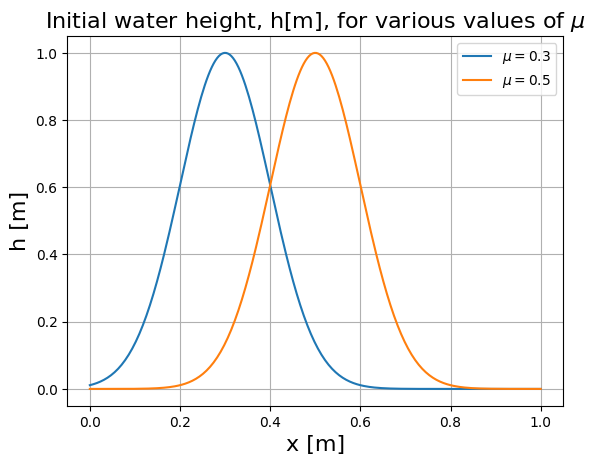

In [16]:
def Gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

save = 1

# Plot the initial condition
x = np.linspace(0, 1, 256)
mu = 0.3
sigma = 0.1
plt.plot(x, Gaussian(x, mu, sigma), label=r'$\mu= 0.3$')
mu = 0.5
plt.plot(x, Gaussian(x, mu, sigma), label=r'$\mu= 0.5$')
plt.title('Initial water height, h[m], for various values of $\mu$')
plt.xlabel('x [m]')
plt.ylabel('h [m]')
plt.legend()
plt.grid()

# Save the figure
if save:
    plt.savefig('plots/data_generation_initial.png')

plt.show()


c:\Users\Matteo\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Matteo\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


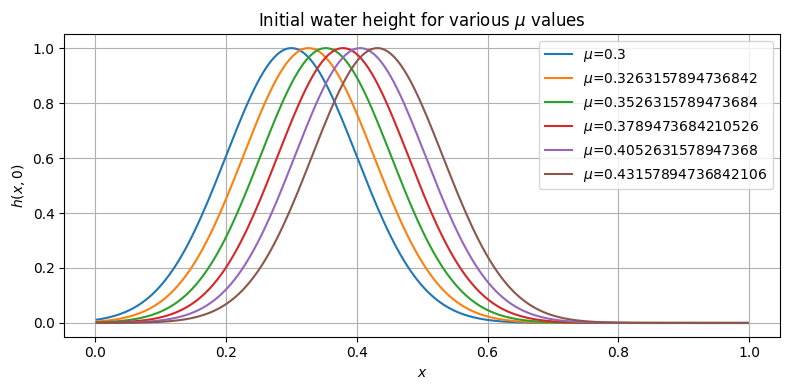

In [4]:
save = 0

# Create a figure
plt.figure(figsize=(8, 4))

# Loop over the loaded data in all_data
for i in range(len(all_data)):
    # Extract the necessary data (x and h_all) from all_data
    mat_data = all_data[i]  # Get the data for the i-th file
    x = mat_data['x'].flatten()  # Flatten if it's a 2D array
    h_all = mat_data['h_all']
    mu = mat_data['mu'][0][0]  # Adjust as needed based on your data structure
    
    # Plot x against the first column of h_all
    plt.plot(x, h_all[0, :], label=fr'$\mu$={mu}')  # Add label for legend

# Add title and labels
plt.title(r'Initial water height for various $\mu$ values')
plt.xlabel('$x$')
plt.ylabel('$h(x, 0)$')
plt.grid(True)  
plt.legend()  

# Save the figure
if save:
    plt.savefig('plots/data_generation_initial.png')

# Show the figure
plt.tight_layout()
plt.show()


## Varying $\sigma$, keep $\mu$ and $h0$.

In [4]:
# Initialize an empty list to store the loaded data
all_data = []

# Loop to load the .mat files from data_sigma_no1.mat to data_sigma_no10.mat
for i in range(1, 11):
    # Construct the filename dynamically
    filename = f'dataFNO/data_sigma_no{i}.mat'
    
    # Load the .mat file
    mat_data = scipy.io.loadmat(filename)
    
    # Print the name of the loaded file
    print(f'Loaded: {filename}')
    
    # Store the loaded data in the list
    all_data.append(mat_data)

# Now all_data contains the loaded data from all 10 files

Loaded: dataFNO/data_sigma_no1.mat
Loaded: dataFNO/data_sigma_no2.mat
Loaded: dataFNO/data_sigma_no3.mat
Loaded: dataFNO/data_sigma_no4.mat
Loaded: dataFNO/data_sigma_no5.mat
Loaded: dataFNO/data_sigma_no6.mat
Loaded: dataFNO/data_sigma_no7.mat
Loaded: dataFNO/data_sigma_no8.mat
Loaded: dataFNO/data_sigma_no9.mat
Loaded: dataFNO/data_sigma_no10.mat


## Animation with Gauss blob

In [51]:
# Load a single .mat file
filename = 'dataFNO/data_sigma_no1.mat'
mat_data = scipy.io.loadmat(filename)    

# Print the keys of the loaded data
print(mat_data.keys())

# Extract the necessary data (x and h_all) from the loaded data
x = mat_data['x'].flatten()
h_all = mat_data['h_all']

h_all.shape

dict_keys(['__header__', '__version__', '__globals__', 'h0', 'h_all', 'sigma', 'time_all', 'u_all', 'x'])


(305, 100)

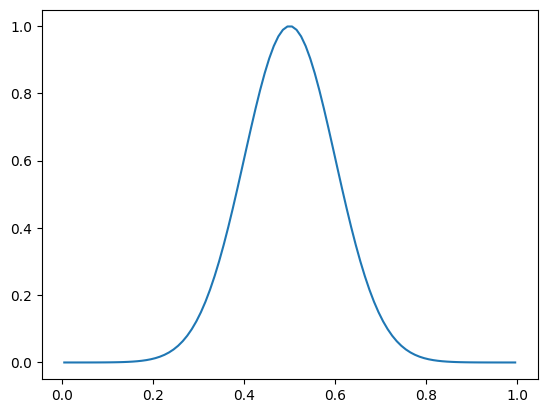

In [78]:
plt.plot(x, h_all[0, :])

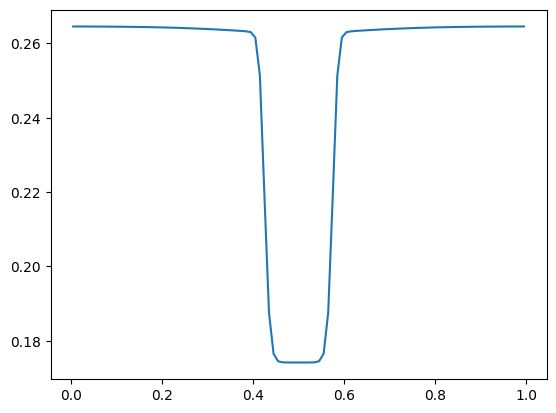

In [77]:
plt.plot(x, h_all[-1, :])

In [58]:
L = 1
N = 100
ani = 0

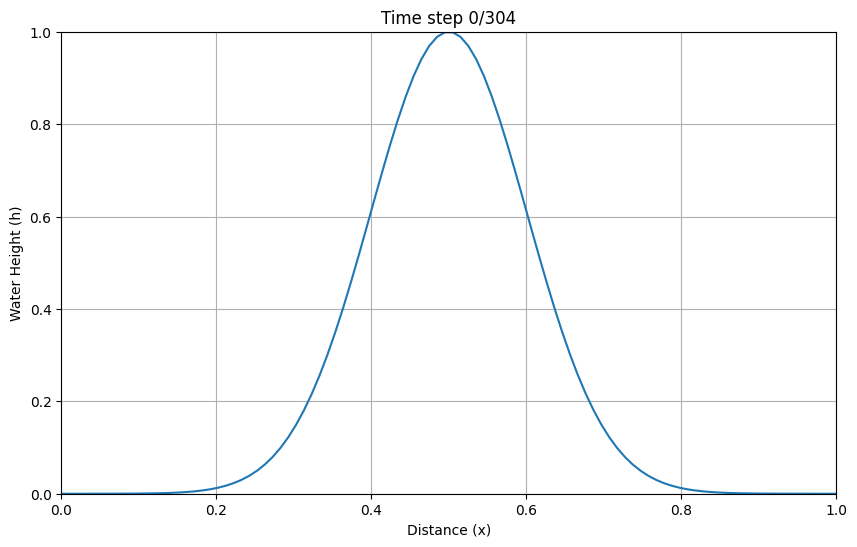

In [72]:
if ani:    
    fig, ax = plt.subplots(figsize=(10, 6))

    def update_plot(index):
        ax.clear()
        ax.plot(np.linspace(0, L, N), h_all[index])
        ax.set_xlabel('Distance (x)')
        ax.set_ylabel('Water Height (h)')
        ax.set_title(f'Time step {index}/{len(h_all) - 1}')
        ax.set_ylim(0, 1)  # Adjust this based on the expected range of water height
        ax.set_xlim(0, L)     # Ensure x-axis limits are consistent
        ax.grid(True)
        
    # Create animation
    ani = animation.FuncAnimation(fig, update_plot, frames=len(h_all), interval=100)

    # Display the animation
    HTML(ani.to_jshtml())

    # Save animation as a gif
    ani.save('animations/animation_gauss_24102024.html', writer='html')
    dpi = 200
    ani.save('animations/animation_gauss_24102024.gif', writer='pillow', dpi = dpi)


In [3]:
if 0:

    # URL to generate QR code for
    url = "https://github.com/MelissaJessen/Shallow-Water-Equations-Animations/tree/main/animation_gauss_24102024.gif"

    # Generate QR code for the URL
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(url)
    qr.make(fit=True)

    # Create an image from the QR code
    img = qr.make_image(fill_color="black", back_color="white")

    # Save the QR code image
    img.save('QR/gauss_28102024.png')

    print("QR code generated successfully!")

QR code generated successfully!
